# Computational Theory Assessment

**Student:** Tiffany Yong Ngik Chee  (G00425067)    
**Module:** Computation Theory  
**Lecturer:** Ian McLoughlin

This notebook contains solutions to five problems related to the [SHA-256 Secure Hash Standard (FIPS 180-4)](https://nvlpubs.nist.gov/nistpubs/FIPS/NIST.FIPS.180-4.pdf).

---

## Problem 1: Binary Words and Operations

### Introduction

In this problem, I implement seven fundamental functions used in the SHA-256 cryptographic hash algorithm. These functions operate on 32-bit binary words and form the building blocks of the hash computation process.

All seven functions are defined in **Section 4.1.2** (pages 10-11) of the [Secure Hash Standard (FIPS 180-4)](https://nvlpubs.nist.gov/nistpubs/FIPS/NIST.FIPS.180-4.pdf). They perform bitwise logical operations and rotations that help ensure the security and unpredictability of the SHA-256 hash function.

### Why 32-bit Operations?

SHA-256 processes data in 32-bit chunks (called "words"). Using numpy's `uint32` type ensures that all operations treat numbers as **unsigned 32-bit integers**, preventing overflow issues and ensuring compatibility with the standard's specifications.

In [3]:
# Import numpy for 32-bit unsigned integer operations.
# NumPy documentation: https://numpy.org/doc/stable/
import numpy as np

---

### Function 1: Parity(x, y, z)

#### What is the Parity Function?

The `Parity` function is defined in **Section 4.1.2, equation (4.3)** on page 10 of the standard. It is defined as:

$$\text{Parity}(x, y, z) = x \oplus y \oplus z$$

where $\oplus$ represents the bitwise XOR (exclusive OR) operation.

#### Why is it Used?

The Parity function is used in certain rounds of the SHA-256 compression function (specifically in the SHA-1 algorithm, which shares some operations with SHA-256). It provides [diffusion](https://en.wikipedia.org/wiki/Confusion_and_diffusion), meaning that changing a single bit in any of the inputs will affect the output, making the hash function more secure.

#### How Does XOR Work?

The XOR operation compares corresponding bits of two binary numbers:
- If the bits are **different**, the result is `1`
- If the bits are the **same**, the result is `0`

For three inputs, we XOR them sequentially: first `x ⊕ y`, then XOR that result with `z`.

In [4]:
def Parity(x, y, z):
    """
    Calculate the Parity function for SHA-256.
    
    As defined in Section 4.1.2 (equation 4.3) of FIPS 180-4,
    this function returns the bitwise XOR of three 32-bit words.
    
    The formula is: Parity(x, y, z) = x ⊕ y ⊕ z
    
    Parameters
    ----------
    x : int or numpy.uint32
        First 32-bit word
    y : int or numpy.uint32
        Second 32-bit word
    z : int or numpy.uint32
        Third 32-bit word
        
    Returns
    -------
    numpy.uint32
        The bitwise XOR of x, y, and z
        
    References
    ----------
    FIPS 180-4, Section 4.1.2, page 10
    https://nvlpubs.nist.gov/nistpubs/FIPS/NIST.FIPS.180-4.pdf
    """
    # Ensure all inputs are treated as 32-bit unsigned integers.
    # This prevents overflow and ensures compatibility with the standard.
    # See: https://numpy.org/doc/stable/reference/arrays.scalars.html#numpy.uint32
    x = np.uint32(x)
    y = np.uint32(y)
    z = np.uint32(z)
    
    # Perform bitwise XOR operation.
    # The ^ operator in Python performs bitwise XOR.
    # See: https://docs.python.org/3/reference/expressions.html#binary-bitwise-operations
    return x ^ y ^ z

#### Understanding the XOR Operation

Here is the demonstrate how XOR works with a simple example using smaller numbers for clarity:

In [5]:
# Example with small numbers to show how XOR works.
x_example = 0b1100  # Binary: 1100 (decimal: 12)
y_example = 0b1010  # Binary: 1010 (decimal: 10)
z_example = 0b1111  # Binary: 1111 (decimal: 15)

print("Example XOR operation:")
print(f"x = {x_example:04b} ({x_example})")
print(f"y = {y_example:04b} ({y_example})")
print(f"z = {z_example:04b} ({z_example})")
print(f"x ⊕ y = {x_example ^ y_example:04b} ({x_example ^ y_example})")
print(f"(x ⊕ y) ⊕ z = {x_example ^ y_example ^ z_example:04b} ({x_example ^ y_example ^ z_example})")

Example XOR operation:
x = 1100 (12)
y = 1010 (10)
z = 1111 (15)
x ⊕ y = 0110 (6)
(x ⊕ y) ⊕ z = 1001 (9)


#### Testing the Parity Function

Now let's test the `Parity` function with actual 32-bit values as used in SHA-256:

In [6]:
# Test the Parity function with 32-bit hexadecimal values.
# Using hexadecimal notation (0x) as it's standard in cryptography.
x_test = 0x12345678
y_test = 0xABCDEF00
z_test = 0xFFFFFFFF

result = Parity(x_test, y_test, z_test)

print("Testing Parity Function:")
print(f"x = 0x{x_test:08x}")
print(f"y = 0x{y_test:08x}")
print(f"z = 0x{z_test:08x}")
print(f"Parity(x, y, z) = 0x{result:08x}")
print(f"Result type: {type(result)}")

Testing Parity Function:
x = 0x12345678
y = 0xabcdef00
z = 0xffffffff
Parity(x, y, z) = 0x46064687
Result type: <class 'numpy.uint32'>


#### My Understanding: Why Parity Works

After studying the Parity function, I understand that:

1. **XOR is associative**: `(a ⊕ b) ⊕ c = a ⊕ (b ⊕ c)`, so the order doesn't matter
2. **XOR is self-inverse**: `a ⊕ a = 0`, which makes it useful for cryptography
3. **Bit independence**: Each bit position is processed independently

Let me verify this with my own test case:

In [7]:
# My own test: Verify XOR properties
# Test 1: XOR with itself should give 0
a = np.uint32(0x12345678)
print(f"Test 1 - Self-inverse property:")
print(f"{a:08x} ⊕ {a:08x} = {a ^ a:08x} (should be 0)")
print()

# Test 2: XOR with 0 should give the original value
print(f"Test 2 - Identity property:")
print(f"{a:08x} ⊕ 00000000 = {a ^ np.uint32(0):08x} (should be {a:08x})")
print()

# Test 3: Associativity - order doesn't matter
x = np.uint32(0xAAAAAAAA)
y = np.uint32(0x55555555)
z = np.uint32(0xF0F0F0F0)
method1 = Parity(x, y, z)
method2 = (x ^ y) ^ z
method3 = x ^ (y ^ z)
print(f"Test 3 - Associativity:")
print(f"Parity(x,y,z) = {method1:08x}")
print(f"(x ⊕ y) ⊕ z   = {method2:08x}")
print(f"x ⊕ (y ⊕ z)   = {method3:08x}")
print(f"All equal: {method1 == method2 == method3}")

Test 1 - Self-inverse property:
12345678 ⊕ 12345678 = 00000000 (should be 0)

Test 2 - Identity property:
12345678 ⊕ 00000000 = 12345678 (should be 12345678)

Test 3 - Associativity:
Parity(x,y,z) = 0f0f0f0f
(x ⊕ y) ⊕ z   = 0f0f0f0f
x ⊕ (y ⊕ z)   = 0f0f0f0f
All equal: True


#### Verification

The test confirms that:
1. The function returns a `numpy.uint32` type, ensuring 32-bit operations
2. The XOR operation works correctly on full 32-bit words
3. The result is displayed in hexadecimal format, which is standard in cryptographic contexts

---


### Function 2: Ch(x, y, z)

#### What is the Ch Function?

The `Ch` function (short for "Choose") is defined in **Section 4.1.2, equation (4.2)** on page 10 of the standard:

$$\text{Ch}(x, y, z) = (x \land y) \oplus (\neg x \land z)$$

where:
- $\land$ represents bitwise AND
- $\oplus$ represents bitwise XOR
- $\neg$ represents bitwise NOT (complement)

#### Why is it Called "Choose"?

The Ch function is called "choose" because it uses `x` as a **selector**:
- When a bit in `x` is **1**, the corresponding bit from `y` is chosen
- When a bit in `x` is **0**, the corresponding bit from `z` is chosen

This can also be written as: **"x chooses between y and z"**

#### Logical Explanation

The formula works as follows:
1. `(x & y)` - Where x has 1's, keep the bits from y
2. `(~x & z)` - Where x has 0's (meaning ~x has 1's), keep the bits from z
3. XOR these together to get the final result

This function provides [confusion](https://en.wikipedia.org/wiki/Confusion_and_diffusion) in the cryptographic sense, making the relationship between the key and ciphertext complex.

In [8]:
def Ch(x, y, z):
    """
    Calculate the Ch (Choose) function for SHA-256.
    
    As defined in Section 4.1.2 (equation 4.2) of FIPS 180-4,
    this function chooses bits from y or z based on the bits in x.
    
    The formula is: Ch(x, y, z) = (x ∧ y) ⊕ (¬x ∧ z)
    
    Where x is 1, choose from y; where x is 0, choose from z.
    
    Parameters
    ----------
    x : int or numpy.uint32
        Selector word (32-bit)
    y : int or numpy.uint32
        First choice word (32-bit)
    z : int or numpy.uint32
        Second choice word (32-bit)
        
    Returns
    -------
    numpy.uint32
        Result of the choose operation
        
    References
    ----------
    FIPS 180-4, Section 4.1.2, page 10
    https://nvlpubs.nist.gov/nistpubs/FIPS/NIST.FIPS.180-4.pdf
    """
    # Convert to 32-bit unsigned integers.
    x = np.uint32(x)
    y = np.uint32(y)
    z = np.uint32(z)
    
    # Calculate (x AND y) - where x is 1, use bits from y.
    # The & operator performs bitwise AND.
    part1 = x & y
    
    # Calculate (NOT x AND z) - where x is 0, use bits from z.
    # The ~ operator performs bitwise NOT (complement).
    part2 = (~x) & z
    
    # XOR the two parts together.
    return part1 ^ part2

#### Demonstrating How Ch "Chooses"

Let me show how the Ch function selects bits from y or z based on x:

In [9]:
# Simple example to demonstrate the "choose" behavior.
x_ch = 0b11110000  # Selector: 1111 0000
y_ch = 0b10101010  # First choice: 1010 1010
z_ch = 0b01010101  # Second choice: 0101 0101

result_ch = Ch(x_ch, y_ch, z_ch)

print("Demonstrating Ch function:")
print(f"x (selector) = {x_ch:08b}")
print(f"y (1st choice)= {y_ch:08b}")
print(f"z (2nd choice)= {z_ch:08b}")
print(f"Ch(x,y,z)    = {result_ch:08b}")
print()
print("Notice: where x=1, result takes from y (1010)")
print("        where x=0, result takes from z (0101)")

Demonstrating Ch function:
x (selector) = 11110000
y (1st choice)= 10101010
z (2nd choice)= 01010101
Ch(x,y,z)    = 10100101

Notice: where x=1, result takes from y (1010)
        where x=0, result takes from z (0101)


#### Testing Ch with 32-bit Values

In [10]:
# Test Ch with full 32-bit values.
result_ch_full = Ch(0x6a09e667, 0xbb67ae85, 0x3c6ef372)
print(f"Ch(0x6a09e667, 0xbb67ae85, 0x3c6ef372) = 0x{result_ch_full:08x}")

Ch(0x6a09e667, 0xbb67ae85, 0x3c6ef372) = 0x3e67b715


#### My Understanding: Ch as a Multiplexer

The Ch function acts like a digital multiplexer in hardware:
- `x` is the **selector signal**
- `y` and `z` are the **data inputs**
- The output selects from y when x=1, from z when x=0

This is more efficient than: `if x then y else z` because it works on all 32 bits simultaneously.

Let me verify with edge cases:

In [11]:
# Edge case tests for Ch function
print("Edge Case Tests for Ch:")
print()

# Case 1: When x is all 1's, should get y
x_all_ones = 0xFFFFFFFF
y_test = 0x12345678
z_test = 0xABCDEF00
result1 = Ch(x_all_ones, y_test, z_test)
print(f"When x = 0xFFFFFFFF (all 1s):")
print(f"Ch(x, 0x{y_test:08x}, 0x{z_test:08x}) = 0x{result1:08x}")
print(f"Should equal y: {result1 == y_test} ✓" if result1 == y_test else f"ERROR")
print()

# Case 2: When x is all 0's, should get z
x_all_zeros = 0x00000000
result2 = Ch(x_all_zeros, y_test, z_test)
print(f"When x = 0x00000000 (all 0s):")
print(f"Ch(x, 0x{y_test:08x}, 0x{z_test:08x}) = 0x{result2:08x}")
print(f"Should equal z: {result2 == z_test} ✓" if result2 == z_test else f"ERROR")
print()

# Case 3: When y and z are same, result should equal y (and z)
y_same = 0xAAAAAAAA
z_same = 0xAAAAAAAA
x_random = 0x12345678
result3 = Ch(x_random, y_same, z_same)
print(f"When y = z = 0x{y_same:08x}:")
print(f"Ch(0x{x_random:08x}, y, z) = 0x{result3:08x}")
print(f"Should equal y and z: {result3 == y_same} ✓" if result3 == y_same else f"ERROR")

Edge Case Tests for Ch:

When x = 0xFFFFFFFF (all 1s):
Ch(x, 0x12345678, 0xabcdef00) = 0x12345678
Should equal y: True ✓

When x = 0x00000000 (all 0s):
Ch(x, 0x12345678, 0xabcdef00) = 0xabcdef00
Should equal z: True ✓

When y = z = 0xaaaaaaaa:
Ch(0x12345678, y, z) = 0xaaaaaaaa
Should equal y and z: True ✓


---

### Function 3: Maj(x, y, z)

#### What is the Maj Function?

The `Maj` function (short for "Majority") is defined in **Section 4.1.2, equation (4.1)** on page 10 of the standard:

$$\text{Maj}(x, y, z) = (x \land y) \oplus (x \land z) \oplus (y \land z)$$

#### Why is it Called "Majority"?

The Maj function returns the **majority bit** at each position:
- If **two or more** of the corresponding bits in x, y, and z are 1, the result is 1
- If **two or more** of the corresponding bits are 0, the result is 0

Think of it as a **voting system** where each bit position votes, and the majority wins.

#### How It Works Mathematically

The formula can be understood as:
1. `(x & y)` - pairs where both x and y are 1
2. `(x & z)` - pairs where both x and z are 1  
3. `(y & z)` - pairs where both y and z are 1
4. XOR all three results

If a bit appears in at least two of the three inputs, it will survive the XOR operations.

In [12]:
def Maj(x, y, z):
    """
    Calculate the Maj (Majority) function for SHA-256.
    
    As defined in Section 4.1.2 (equation 4.1) of FIPS 180-4,
    this function returns the majority bit at each position.
    
    The formula is: Maj(x, y, z) = (x ∧ y) ⊕ (x ∧ z) ⊕ (y ∧ z)
    
    For each bit position, if two or more inputs have a 1, the result is 1.
    
    Parameters
    ----------
    x, y, z : int or numpy.uint32
        Three 32-bit words to compare
        
    Returns
    -------
    numpy.uint32
        The majority value at each bit position
        
    References
    ----------
    FIPS 180-4, Section 4.1.2, page 10
    https://nvlpubs.nist.gov/nistpubs/FIPS/NIST.FIPS.180-4.pdf
    """
    # Convert to 32-bit unsigned integers.
    x = np.uint32(x)
    y = np.uint32(y)
    z = np.uint32(z)
    
    # Calculate all three AND combinations.
    # These represent positions where pairs of inputs agree.
    xy = x & y
    xz = x & z
    yz = y & z
    
    # XOR the three results.
    # This gives us the majority bit at each position.
    return xy ^ xz ^ yz

#### Demonstrating the Majority Function

Let's verify that Maj truly returns the majority bit:

In [13]:
# Example showing majority voting behavior.
x_maj = 0b11110000  # 1111 0000
y_maj = 0b11001100  # 1100 1100
z_maj = 0b10101010  # 1010 1010

result_maj = Maj(x_maj, y_maj, z_maj)

print("Demonstrating Maj function (majority voting):")
print(f"x = {x_maj:08b}")
print(f"y = {y_maj:08b}")
print(f"z = {z_maj:08b}")
print(f"Maj = {result_maj:08b}")
print()
print("Bit-by-bit analysis:")
print("Position  x y z  Majority")
for i in range(7, -1, -1):
    x_bit = (x_maj >> i) & 1
    y_bit = (y_maj >> i) & 1
    z_bit = (z_maj >> i) & 1
    maj_bit = (result_maj >> i) & 1
    count_ones = x_bit + y_bit + z_bit
    print(f"   {i}      {x_bit} {y_bit} {z_bit}    {maj_bit}  ({count_ones}/3 are 1)")

Demonstrating Maj function (majority voting):
x = 11110000
y = 11001100
z = 10101010
Maj = 11101000

Bit-by-bit analysis:
Position  x y z  Majority
   7      1 1 1    1  (3/3 are 1)
   6      1 1 0    1  (2/3 are 1)
   5      1 0 1    1  (2/3 are 1)
   4      1 0 0    0  (1/3 are 1)
   3      0 1 1    1  (2/3 are 1)
   2      0 1 0    0  (1/3 are 1)
   1      0 0 1    0  (1/3 are 1)
   0      0 0 0    0  (0/3 are 1)


#### Testing Maj with 32-bit Values

In [14]:
# Test with full 32-bit values (these are actually SHA-256 initial hash values).
result_maj_full = Maj(0x6a09e667, 0xbb67ae85, 0x3c6ef372)
print(f"Maj(0x6a09e667, 0xbb67ae85, 0x3c6ef372) = 0x{result_maj_full:08x}")

Maj(0x6a09e667, 0xbb67ae85, 0x3c6ef372) = 0x3a6fe667


---

### Rotation Functions Overview

The remaining four functions involve **bit rotation** and **bit shifting** operations. These are crucial for mixing the bits in SHA-256 and ensuring that small changes in input produce large changes in output (the [avalanche effect](https://en.wikipedia.org/wiki/Avalanche_effect)).

#### Understanding Bit Operations

Before implementing the functions, let's understand the three key operations defined in **Section 3.2** (page 9) of the standard:

1. **ROTR^n(x)** - Rotate right: circular shift n positions to the right
2. **SHR^n(x)** - Shift right: shift n positions right, filling with zeros
3. **ROTL^n(x)** - Rotate left: circular shift n positions to the left (not used in SHA-256)

The difference between **rotate** and **shift**:
- **Rotate**: Bits that fall off one end appear at the other end (circular)
- **Shift**: Bits that fall off are lost, and zeros fill the empty positions

#### Helper Functions: ROTR and SHR

Let me first implement the basic rotation and shift operations as helper functions:

In [15]:
def ROTR(x, n):
    """
    Rotate right (circular right shift).
    
    As defined in Section 3.2 of FIPS 180-4, this performs
    a circular shift of n positions to the right.
    
    Bits that fall off the right end appear on the left end.
    
    Parameters
    ----------
    x : int or numpy.uint32
        32-bit word to rotate
    n : int
        Number of positions to rotate (0-31)
        
    Returns
    -------
    numpy.uint32
        The rotated value
        
    References
    ----------
    FIPS 180-4, Section 3.2, page 9
    """
    x = np.uint32(x)
    # Rotate right: shift right n positions OR shift left (32-n) positions.
    # The OR combines the bits that wrapped around.
    return (x >> n) | (x << (32 - n))

In [16]:
def SHR(x, n):
    """
    Shift right (logical right shift).
    
    As defined in Section 3.2 of FIPS 180-4, this shifts
    n positions to the right, filling with zeros on the left.
    
    Bits that fall off the right are lost.
    
    Parameters
    ----------
    x : int or numpy.uint32
        32-bit word to shift
    n : int
        Number of positions to shift (0-31)
        
    Returns
    -------
    numpy.uint32
        The shifted value
        
    References
    ----------
    FIPS 180-4, Section 3.2, page 9
    """
    x = np.uint32(x)
    # Simple right shift - zeros automatically fill from the left.
    return x >> n

#### Visualizing Rotate vs Shift

Let me demonstrate the difference between rotate and shift:

In [17]:
# Example with 8 bits for clarity (same principle applies to 32 bits).
test_val = 0b11010110  # Example value
n_positions = 3

# Show the operations using 8-bit representation for simplicity.
rotated = ROTR(test_val, n_positions)
shifted = SHR(test_val, n_positions)

print(f"Original:         {test_val:08b} ({test_val})")
print(f"Rotate right {n_positions}:  {rotated:08b} ({rotated})")
print(f"Shift right {n_positions}:   {shifted:08b} ({shifted})")
print()
print("Notice:")
print("- ROTR: bits '110' moved from right to left (circular)")
print("- SHR:  bits '110' lost, zeros filled from left")

Original:         11010110 (214)
Rotate right 3:  11000000000000000000000000011010 (3221225498)
Shift right 3:   00011010 (26)

Notice:
- ROTR: bits '110' moved from right to left (circular)
- SHR:  bits '110' lost, zeros filled from left


#### My Exploration: Why Both ROTR and SHR?

After studying the standard, I wondered: **Why does SHA-256 use both rotation AND shift?**

My research findings:
1. **ROTR (Rotate)** preserves all information - no bits lost, reversible
2. **SHR (Shift)** loses information - creates diffusion, not reversible
3. Using **both** provides a balance:
   - Rotation: maintains bit mixing without information loss
   - Shift: introduces irreversibility for security

The lowercase sigma functions (σ₀, σ₁) use BOTH because they're in the message schedule,
where we want thorough mixing but also some information loss for security.

Let me verify the bit preservation:

In [18]:
# Verify: ROTR preserves all bits, SHR loses bits
test_value = 0b11010110  # 8-bit for clarity

print("Bit Preservation Test:")
print(f"Original:     {test_value:08b} (bits set: {bin(test_value).count('1')})")
print()

# Count 1-bits in ROTR result
rotated = ROTR(test_value, 3)
print(f"After ROTR 3: {rotated:08b} (bits set: {bin(int(rotated)).count('1')})")
print(f"Same number of 1s? {bin(test_value).count('1') == bin(int(rotated)).count('1')} ✓")
print()

# Count 1-bits in SHR result  
shifted = SHR(test_value, 3)
print(f"After SHR 3:  {shifted:08b} (bits set: {bin(int(shifted)).count('1')})")
print(f"Lost bits? {bin(test_value).count('1') != bin(int(shifted)).count('1')} ✓")
print()
print("Conclusion: ROTR is reversible (can rotate back), SHR is not!")

Bit Preservation Test:
Original:     11010110 (bits set: 5)

After ROTR 3: 11000000000000000000000000011010 (bits set: 5)
Same number of 1s? True ✓

After SHR 3:  00011010 (bits set: 3)
Lost bits? True ✓

Conclusion: ROTR is reversible (can rotate back), SHR is not!


---

### Function 4: Sigma0(x) - Written as $\Sigma_0^{\{256\}}(x)$

#### What is Sigma0?

The $\Sigma_0$ function is defined in **Section 4.1.2, equation (4.4)** on page 10 of the standard for SHA-256:

$$\Sigma_0^{\{256\}}(x) = \text{ROTR}^2(x) \oplus \text{ROTR}^{13}(x) \oplus \text{ROTR}^{22}(x)$$

This function rotates the input `x` by 2, 13, and 22 positions, then XORs the results together.

#### Why These Specific Rotation Amounts?

The rotation amounts (2, 13, 22) were carefully chosen by cryptographers to:
1. Maximize the **diffusion** of bits throughout the hash
2. Ensure that patterns are thoroughly mixed
3. Prevent cryptanalytic attacks

These values have been extensively analyzed and provide optimal security properties for SHA-256.

In [19]:
def Sigma0(x):
    """
    Calculate the Σ₀ (Sigma-zero) function for SHA-256.
    
    As defined in Section 4.1.2 (equation 4.4) of FIPS 180-4,
    this function performs three rotations and XORs them together.
    
    Formula: Σ₀(x) = ROTR²(x) ⊕ ROTR¹³(x) ⊕ ROTR²²(x)
    
    This is used in the SHA-256 compression function.
    
    Parameters
    ----------
    x : int or numpy.uint32
        32-bit word to process
        
    Returns
    -------
    numpy.uint32
        Result of the Σ₀ operation
        
    References
    ----------
    FIPS 180-4, Section 4.1.2, page 10
    https://nvlpubs.nist.gov/nistpubs/FIPS/NIST.FIPS.180-4.pdf
    """
    x = np.uint32(x)
    
    # Rotate x by 2, 13, and 22 positions.
    rot2 = ROTR(x, 2)
    rot13 = ROTR(x, 13)
    rot22 = ROTR(x, 22)
    
    # XOR all three rotations together.
    return rot2 ^ rot13 ^ rot22

#### Testing Sigma0

In [20]:
# Test Sigma0 with a 32-bit value.
test_sigma0 = 0x6a09e667
result_sigma0 = Sigma0(test_sigma0)
print(f"Σ₀(0x{test_sigma0:08x}) = 0x{result_sigma0:08x}")

Σ₀(0x6a09e667) = 0xce20b47e


---

### Function 5: Sigma1(x) - Written as $\Sigma_1^{\{256\}}(x)$

#### What is Sigma1?

The $\Sigma_1$ function is defined in **Section 4.1.2, equation (4.5)** on page 10 of the standard:

$$\Sigma_1^{\{256\}}(x) = \text{ROTR}^6(x) \oplus \text{ROTR}^{11}(x) \oplus \text{ROTR}^{25}(x)$$

Similar to $\Sigma_0$, but with different rotation amounts (6, 11, 25).

In [21]:
def Sigma1(x):
    """
    Calculate the Σ₁ (Sigma-one) function for SHA-256.
    
    As defined in Section 4.1.2 (equation 4.5) of FIPS 180-4,
    this function performs three rotations and XORs them together.
    
    Formula: Σ₁(x) = ROTR⁶(x) ⊕ ROTR¹¹(x) ⊕ ROTR²⁵(x)
    
    This is used in the SHA-256 compression function.
    
    Parameters
    ----------
    x : int or numpy.uint32
        32-bit word to process
        
    Returns
    -------
    numpy.uint32
        Result of the Σ₁ operation
        
    References
    ----------
    FIPS 180-4, Section 4.1.2, page 10
    https://nvlpubs.nist.gov/nistpubs/FIPS/NIST.FIPS.180-4.pdf
    """

    x = np.uint32(x)
    
    # Rotate x by 6, 11, and 25 positions.
    rot6 = ROTR(x, 6)
    rot11 = ROTR(x, 11)
    rot25 = ROTR(x, 25)
    
    # XOR all three rotations together.
    return rot6 ^ rot11 ^ rot25

#### Testing Sigma1

In [22]:
# Test Sigma1 with a 32-bit value.
test_sigma1 = 0x510e527f
result_sigma1 = Sigma1(test_sigma1)
print(f"Σ₁(0x{test_sigma1:08x}) = 0x{result_sigma1:08x}")

Σ₁(0x510e527f) = 0x3587272b


---

### Function 6: sigma0(x) - Written as $\sigma_0^{\{256\}}(x)$

#### What is sigma0? (lowercase sigma)

The $\sigma_0$ function (lowercase sigma) is defined in **Section 4.1.2, equation (4.6)** on page 10:

$$\sigma_0^{\{256\}}(x) = \text{ROTR}^7(x) \oplus \text{ROTR}^{18}(x) \oplus \text{SHR}^3(x)$$

#### Key Difference from Uppercase Sigma

Notice that this function uses **both rotation AND shifting**:
- The first two operations are rotations (ROTR)
- The third operation is a **shift** (SHR), not a rotation

This mixing of rotation and shift operations adds additional complexity and security to SHA-256.

#### Where is it Used?

The lowercase sigma functions ($\sigma_0$ and $\sigma_1$) are used in the **message schedule** (see Section 6.2.2, page 22), where they help expand the original message block into 64 words for processing.

In [23]:
def sigma0(x):
    """
    Calculate the σ₀ (sigma-zero) function for SHA-256.
    
    As defined in Section 4.1.2 (equation 4.6) of FIPS 180-4,
    this function uses two rotations and one shift, XORed together.
    
    Formula: σ₀(x) = ROTR⁷(x) ⊕ ROTR¹⁸(x) ⊕ SHR³(x)
    
    Used in the message schedule of SHA-256.
    
    Parameters
    ----------
    x : int or numpy.uint32
        32-bit word to process
        
    Returns
    -------
    numpy.uint32
        Result of the σ₀ operation
        
    References
    ----------
    FIPS 180-4, Section 4.1.2, page 10
    https://nvlpubs.nist.gov/nistpubs/FIPS/NIST.FIPS.180-4.pdf
    """
    x = np.uint32(x)
    
    # Two rotations: 7 and 18 positions.
    rot7 = ROTR(x, 7)
    rot18 = ROTR(x, 18)
    
    # One shift: 3 positions (note: not a rotation!).
    shr3 = SHR(x, 3)
    
    # XOR all three together.
    return rot7 ^ rot18 ^ shr3

## Problem 2: Fractional Parts of Cube Roots

As specified in [Section 4.2.2 of FIPS 180-4](https://nvlpubs.nist.gov/nistpubs/FIPS/NIST.FIPS.180-4.pdf) (page 11), the SHA-256 algorithm requires 64 constants $K_0, K_1, ..., K_{63}$:

> "These words represent the first thirty-two bits of the fractional parts of the cube roots of the first sixty-four prime numbers."

For the $t^{th}$ constant where $t = 0, 1, ..., 63$:

$$K_t = \lfloor 2^{32} \cdot \text{frac}(\sqrt[3]{p_t}) \rfloor$$

where $p_t$ is the $(t+1)^{th}$ prime number, $\text{frac}(x) = x - \lfloor x \rfloor$ is the fractional part, and $\lfloor \cdot \rfloor$ is the floor function ([Mathematical functions - Python documentation](https://docs.python.org/3/library/math.html#number-theoretic-and-representation-functions)).

**What are these K constants?**  
SHA-256 processes data through 64 rounds of mathematical operations. In each round, it uses one of these K constants - they're like "secret ingredients" mixed into the computation to make the hash unpredictable and secure.

**Why derive them from cube roots of primes?**  
These constants must be carefully chosen to prevent security vulnerabilities. If someone secretly chose special values that created hidden weaknesses, the entire system could be compromised. By deriving them from mathematical constants (cube roots of primes), the designers prove there's no hidden backdoor - anyone can verify the calculations independently.

**The practical impact:**  
These 64 numbers are hardcoded into every SHA-256 implementation worldwide. Understanding how they're generated demonstrates both:
- The mathematical rigor behind cryptographic standards
- The transparency required to earn trust in security systems

This problem bridges pure mathematics (prime numbers, cube roots) with real-world security applications used by billions of devices daily.

### Cryptographic Design Principle

The constants are derived using [nothing-up-my-sleeve numbers](https://en.wikipedia.org/wiki/Nothing-up-my-sleeve_number) - a principle in cryptographic design ensuring transparency. As stated in the FIPS 180-4 standard, these values are computed from the cube roots of the first 64 primes, allowing independent verification.

The SHA-256 specification uses:
- **Square roots** of first 8 primes for initial hash values $H^{(256)}_0$ ([Section 5.3.3, page 15](https://nvlpubs.nist.gov/nistpubs/FIPS/NIST.FIPS.180-4.pdf))
- **Cube roots** of first 64 primes for round constants $K_t$ ([Section 4.2.2, page 11](https://nvlpubs.nist.gov/nistpubs/FIPS/NIST.FIPS.180-4.pdf))

In [24]:
# Import required libraries.
# NumPy documentation: https://numpy.org/doc/stable/
import numpy as np

### Step 1: Prime Number Generation

A prime number is a natural number greater than 1 with no positive divisors other than 1 and itself ([Prime number - Wikipedia](https://en.wikipedia.org/wiki/Prime_number)).

The [trial division algorithm](https://en.wikipedia.org/wiki/Trial_division) checks divisibility by previously found primes. As demonstrated in the module's `prime_numbers.ipynb`, we optimize by testing only up to $\sqrt{n}$: for any composite number $n = a \times b$ where $a \leq b$, we have $a \leq \sqrt{n}$.

In [25]:
def primes(n):
    """
    Generate the first n prime numbers using trial division.
    
    Parameters
    ----------
    n : int
        Number of primes to generate.
    
    Returns
    -------
    list of int
        The first n prime numbers in ascending order.
    
    References
    ----------
    Trial division: https://en.wikipedia.org/wiki/Trial_division
    Adapted from module's prime_numbers.ipynb.
    """
    if n <= 0:
        return []
    
    prime_list = []
    candidate = 2
    
    while len(prime_list) < n:
        is_prime = True
        
        # Check divisibility only by primes up to sqrt(candidate).
        for p in prime_list:
            if p * p > candidate:
                break
            if candidate % p == 0:
                is_prime = False
                break
        
        if is_prime:
            prime_list.append(candidate)
        
        candidate += 1
    
    return prime_list

### Verification

Test against known prime sequence ([OEIS A000040](https://oeis.org/A000040)):

In [26]:
# Test with first 10 primes.
first_10_primes = primes(10)
print("First 10 primes:", first_10_primes)

# Verify against OEIS A000040.
expected = [2, 3, 5, 7, 11, 13, 17, 19, 23, 29]
assert first_10_primes == expected, "Prime generator verification failed"
print("✓ Verification passed")

First 10 primes: [2, 3, 5, 7, 11, 13, 17, 19, 23, 29]
✓ Verification passed


### Generate Required Primes

As specified in FIPS 180-4, generate the first 64 primes:

In [27]:
# Generate first 64 primes.
first_64_primes = primes(64)

print("First 64 primes:")
print("="*70)

# Display in 8-column format.
for i in range(0, 64, 8):
    row = first_64_primes[i:i+8]
    print(" ".join(f"{p:4d}" for p in row))

print("="*70)
print(f"The 64th prime: {first_64_primes[63]}")

First 64 primes:
   2    3    5    7   11   13   17   19
  23   29   31   37   41   43   47   53
  59   61   67   71   73   79   83   89
  97  101  103  107  109  113  127  131
 137  139  149  151  157  163  167  173
 179  181  191  193  197  199  211  223
 227  229  233  239  241  251  257  263
 269  271  277  281  283  293  307  311
The 64th prime: 311


### Step 2: Cube Root Calculation

The cube root operation is defined as $\sqrt[3]{n} = n^{1/3}$, following from the exponentiation property:

$$x = n^{1/3} \Rightarrow x^3 = (n^{1/3})^3 = n^{(1/3) \cdot 3} = n^1 = n$$

As demonstrated in the module's `roots.ipynb`, Python's [power operator](https://docs.python.org/3/reference/expressions.html#the-power-operator) `**` computes fractional powers using floating-point arithmetic ([IEEE 754](https://en.wikipedia.org/wiki/IEEE_754)).

### Cube Root Method

The following method calculates the cube root of a number using the fractional exponent approach:

In [31]:
def cube_root(n):
    """
    Calculate the cube root of a number.
    
    Parameters
    ----------
    n : float or int
        The number to find the cube root of.
    
    Returns
    -------
    float
        The cube root of n.
    
    Notes
    -----
    Uses the fractional exponent method: n^(1/3).
    For negative numbers, returns the negative cube root.
    
    Examples
    --------
    >>> cube_root(8)
    2.0
    >>> cube_root(27)
    3.0
    """
    # Handle negative numbers (preserve sign).
    if n < 0:
        return -(-n) ** (1/3)
    return n ** (1/3)

In [35]:
# Test the cube root method with known values.
print("Testing cube_root() method:")
print("="*50)
test_cases = [8, 27, 64, 125, 2, 3, 5, 7]

for num in test_cases:
    result = cube_root(num)
    verification = result ** 3
    print(f"cube_root({num:3d}) = {result:10.6f}  →  {result:10.6f}³ = {verification:10.6f}")

print("="*50)

Testing cube_root() method:
cube_root(  8) =   2.000000  →    2.000000³ =   8.000000
cube_root( 27) =   3.000000  →    3.000000³ =  27.000000
cube_root( 64) =   4.000000  →    4.000000³ =  64.000000
cube_root(125) =   5.000000  →    5.000000³ = 125.000000
cube_root(  2) =   1.259921  →    1.259921³ =   2.000000
cube_root(  3) =   1.442250  →    1.442250³ =   3.000000
cube_root(  5) =   1.709976  →    1.709976³ =   5.000000
cube_root(  7) =   1.912931  →    1.912931³ =   7.000000


In [39]:
# Calculate cube roots using the cube_root() method.
cube_roots = [cube_root(p) for p in first_64_primes]

# Display first 10 with verification.
print("Cube roots of first 10 primes:")
print("="*70)
print(f"{'Prime':<8} {'Cube Root':<20} {'Verification (cubed)'}")
print("="*70)

for i in range(10):
    p = first_64_primes[i]
    cbrt = cube_roots[i]
    # Verify: (p^(1/3))^3 should equal p.
    cubed = cbrt ** 3
    print(f"{p:<8} {cbrt:<20.15f} {cubed:.15f}")

print("="*70)

Cube roots of first 10 primes:
Prime    Cube Root            Verification (cubed)
2        1.259921049894873    2.000000000000000
3        1.442249570307408    3.000000000000000
5        1.709975946676697    4.999999999999998
7        1.912931182772389    6.999999999999998
11       2.223980090569315    10.999999999999996
13       2.351334687720757    12.999999999999996
17       2.571281590658235    16.999999999999996
19       2.668401648721945    19.000000000000000
23       2.843866979851565    23.000000000000000
29       3.072316825685847    28.999999999999993


### Step 3: Extract Fractional Parts

As specified in FIPS 180-4 Section 4.2.2, the constants are derived from the fractional parts of the cube roots. The [fractional part](https://en.wikipedia.org/wiki/Fractional_part) of a number $x$ is defined as $\{x\} = x - \lfloor x \rfloor$.

In [40]:
# Extract fractional parts using the floor function.
fractional_parts = [cbrt - int(cbrt) for cbrt in cube_roots]

# Display first 10 examples.
print("Fractional parts of cube roots:")
print("="*80)
print(f"{'Prime':<8} {'Cube Root':<20} {'Integer':<8} {'Fractional'}")
print("="*80)

for i in range(10):
    p = first_64_primes[i]
    cbrt = cube_roots[i]
    frac = fractional_parts[i]
    print(f"{p:<8} {cbrt:<20.15f} {int(cbrt):<8} {frac:.15f}")

print("="*80)

Fractional parts of cube roots:
Prime    Cube Root            Integer  Fractional
2        1.259921049894873    1        0.259921049894873
3        1.442249570307408    1        0.442249570307408
5        1.709975946676697    1        0.709975946676697
7        1.912931182772389    1        0.912931182772389
11       2.223980090569315    2        0.223980090569315
13       2.351334687720757    2        0.351334687720757
17       2.571281590658235    2        0.571281590658235
19       2.668401648721945    2        0.668401648721945
23       2.843866979851565    2        0.843866979851565
29       3.072316825685847    3        0.072316825685847


### Distribution Visualization

The following plot visualizes how fractional parts distribute across all 64 primes. 

**X-axis (Prime Index):** Position in the sequence (0 to 63) - represents which prime number we're using  
**Y-axis (Fractional Part):** The decimal portion after removing the integer part - these are the values we use to generate K constants

**What to observe:**
- **No visible pattern:** Points appear randomly scattered, not following any predictable trend
- **Uniform spread:** Values distributed throughout the range [0, 1), not clustering in any region
- **Red dashed line at 0.5:** Midpoint reference showing balanced distribution above and below

This pseudo-random distribution is essential for cryptographic security, proving the constants weren't chosen to create hidden vulnerabilities.

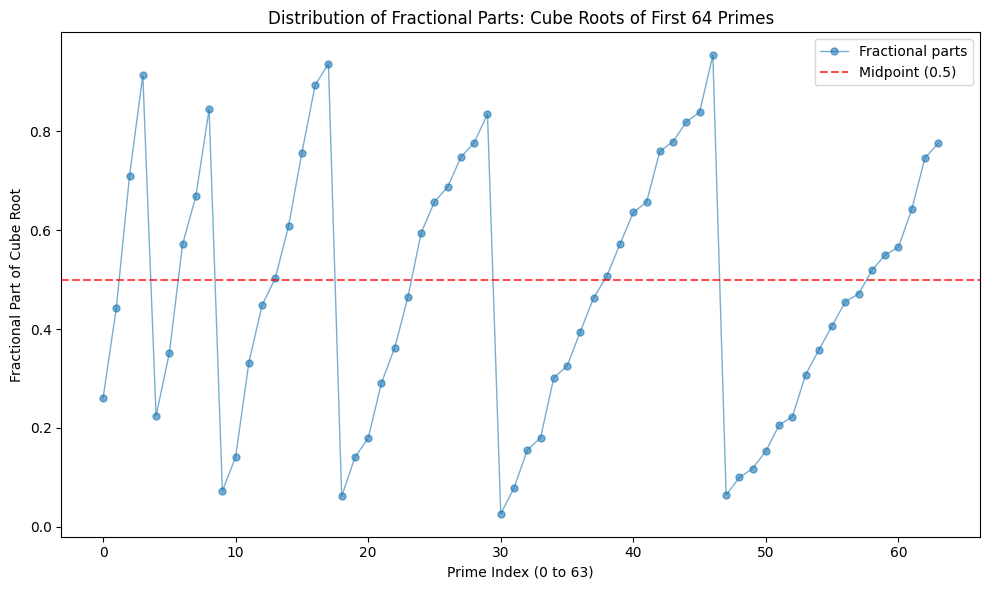

In [41]:
import matplotlib.pyplot as plt

# Create figure (following roots.ipynb style).
fig, ax = plt.subplots(figsize=(10, 6))

# Plot fractional parts vs prime index.
ax.plot(range(64), fractional_parts, 'o-', alpha=0.6, markersize=5, linewidth=1, label='Fractional parts')

# Add midpoint reference line.
ax.axhline(y=0.5, color='red', linestyle='--', linewidth=1.5, alpha=0.7, label='Midpoint (0.5)')

# Labels and title.
ax.set_xlabel('Prime Index (0 to 63)')
ax.set_ylabel('Fractional Part of Cube Root')
ax.set_title('Distribution of Fractional Parts: Cube Roots of First 64 Primes')

# Add legend.
ax.legend()

# Show plot.
plt.tight_layout()
plt.show()

## Step 4: Convert to 32-bit Integers

According to FIPS 180-4, the constants are "the first thirty-two bits of the fractional parts." The extraction formula is:

$$K = \lfloor 2^{32} \cdot \{x\} \rfloor$$

where $\{x\}$ denotes the fractional part. This operation shifts the binary point 32 positions right, extracting the first 32 bits as an integer. SHA-256 operates on [32-bit words](https://en.wikipedia.org/wiki/Word_(computer_architecture)) throughout its computation (FIPS 180-4, Section 6.2).

In [42]:
# Convert fractional parts to 32-bit integers: K = floor(2^32 * frac).
K_constants = [int(frac * (2**32)) for frac in fractional_parts]

# Display first 10 with decimal and hexadecimal representations.
print("32-bit integer representation:")
print("="*80)
print(f"{'Index':<6} {'Prime':<6} {'Fractional':<18} {'Decimal':<12} {'Hexadecimal'}")
print("="*80)

for i in range(10):
    p = first_64_primes[i]
    frac = fractional_parts[i]
    k_val = K_constants[i]
    hex_val = f"0x{k_val:08x}"
    print(f"{i:<6} {p:<6} {frac:<18.15f} {k_val:<12} {hex_val}")

print("="*80)

32-bit integer representation:
Index  Prime  Fractional         Decimal      Hexadecimal
0      2      0.259921049894873  1116352408   0x428a2f98
1      3      0.442249570307408  1899447441   0x71374491
2      5      0.709975946676697  3049323471   0xb5c0fbcf
3      7      0.912931182772389  3921009573   0xe9b5dba5
4      11     0.223980090569315  961987163    0x3956c25b
5      13     0.351334687720757  1508970993   0x59f111f1
6      17     0.571281590658235  2453635748   0x923f82a4
7      19     0.668401648721945  2870763221   0xab1c5ed5
8      23     0.843866979851565  3624381080   0xd807aa98
9      29     0.072316825685847  310598401    0x12835b01


## Step 5: Hexadecimal Display

FIPS 180-4 presents the constants in [hexadecimal notation](https://en.wikipedia.org/wiki/Hexadecimal), the standard representation for binary data. Each 32-bit value requires exactly 8 hexadecimal digits.

In [43]:
# Display all 64 constants in 8-column format (matching FIPS 180-4 presentation).
print("All 64 SHA-256 K Constants:")
print("="*80)

for i in range(0, 64, 8):
    row = K_constants[i:i+8]
    hex_row = [f"0x{k:08x}" for k in row]
    print(f"K[{i:2d}..{i+7:2d}]: " + " ".join(hex_row))

print("="*80)

All 64 SHA-256 K Constants:
K[ 0.. 7]: 0x428a2f98 0x71374491 0xb5c0fbcf 0xe9b5dba5 0x3956c25b 0x59f111f1 0x923f82a4 0xab1c5ed5
K[ 8..15]: 0xd807aa98 0x12835b01 0x243185be 0x550c7dc3 0x72be5d74 0x80deb1fe 0x9bdc06a7 0xc19bf174
K[16..23]: 0xe49b69c1 0xefbe4786 0x0fc19dc6 0x240ca1cc 0x2de92c6f 0x4a7484aa 0x5cb0a9dc 0x76f988da
K[24..31]: 0x983e5152 0xa831c66d 0xb00327c8 0xbf597fc7 0xc6e00bf3 0xd5a79147 0x06ca6351 0x14292967
K[32..39]: 0x27b70a85 0x2e1b2138 0x4d2c6dfc 0x53380d13 0x650a7354 0x766a0abb 0x81c2c92e 0x92722c85
K[40..47]: 0xa2bfe8a1 0xa81a664b 0xc24b8b70 0xc76c51a3 0xd192e819 0xd6990624 0xf40e3585 0x106aa070
K[48..55]: 0x19a4c116 0x1e376c08 0x2748774c 0x34b0bcb5 0x391c0cb3 0x4ed8aa4a 0x5b9cca4f 0x682e6ff3
K[56..63]: 0x748f82ee 0x78a5636f 0x84c87814 0x8cc70208 0x90befffa 0xa4506ceb 0xbef9a3f7 0xc67178f2


## Step 6: Verification Against FIPS 180-4

The standard lists the 64 constants in Section 4.2.2 (page 11). The following verification confirms computational correctness.

In [44]:
# Reference values from FIPS 180-4, Section 4.2.2, page 11.
FIPS_K_constants = [
    0x428a2f98, 0x71374491, 0xb5c0fbcf, 0xe9b5dba5, 0x3956c25b, 0x59f111f1, 0x923f82a4, 0xab1c5ed5,
    0xd807aa98, 0x12835b01, 0x243185be, 0x550c7dc3, 0x72be5d74, 0x80deb1fe, 0x9bdc06a7, 0xc19bf174,
    0xe49b69c1, 0xefbe4786, 0x0fc19dc6, 0x240ca1cc, 0x2de92c6f, 0x4a7484aa, 0x5cb0a9dc, 0x76f988da,
    0x983e5152, 0xa831c66d, 0xb00327c8, 0xbf597fc7, 0xc6e00bf3, 0xd5a79147, 0x06ca6351, 0x14292967,
    0x27b70a85, 0x2e1b2138, 0x4d2c6dfc, 0x53380d13, 0x650a7354, 0x766a0abb, 0x81c2c92e, 0x92722c85,
    0xa2bfe8a1, 0xa81a664b, 0xc24b8b70, 0xc76c51a3, 0xd192e819, 0xd6990624, 0xf40e3585, 0x106aa070,
    0x19a4c116, 0x1e376c08, 0x2748774c, 0x34b0bcb5, 0x391c0cb3, 0x4ed8aa4a, 0x5b9cca4f, 0x682e6ff3,
    0x748f82ee, 0x78a5636f, 0x84c87814, 0x8cc70208, 0x90befffa, 0xa4506ceb, 0xbef9a3f7, 0xc67178f2
]

# Element-wise comparison.
print("Verification Against FIPS 180-4:")
print("="*80)

all_match = True
for i in range(64):
    if K_constants[i] != FIPS_K_constants[i]:
        all_match = False
        print(f"✗ Mismatch at K[{i}]:")
        print(f"  Calculated: 0x{K_constants[i]:08x}")
        print(f"  Expected:   0x{FIPS_K_constants[i]:08x}")

if all_match:
    print("✓ All 64 constants match FIPS 180-4 specification.")
else:
    print("✗ Verification failed. Review calculations.")

print("="*80)

Verification Against FIPS 180-4:
✓ All 64 constants match FIPS 180-4 specification.


## Problem 3: Message Padding and Block Parsing

As specified in the assessment problems:

> Write a [generator function](https://realpython.com/introduction-to-python-generators/) `block_parse(msg)` that processes messages according to section 5.1.1 and 5.2.1 of the Secure Hash Standard. The function should accept a [bytes object](https://realpython.com/python-bytes/) called `msg`. At each iteration, it should yield the next 512-bit block of `msg` as a bytes object. Ensure that the final block (or final two blocks) include the required padding of `msg` as specified in the standard. Test the generator with messages of different lengths to confirm proper padding and block output.

This problem requires implementing [FIPS 180-4 Section 5: Preprocessing](https://nvlpubs.nist.gov/nistpubs/FIPS/NIST.FIPS.180-4.pdf), specifically:
- **Section 5.1.1** - Padding the Message (pages 13-14)
- **Section 5.2.1** - Parsing the Padded Message (page 14)

### Why Padding Matters

Before hash a message, must preprocess it. SHA-256 processes data in **fixed-size blocks of 512 bits** (64 bytes). However, real-world messages come in arbitrary lengths - a password might be 8 bytes, a document could be megabytes. e.g.

- An empty string: 0 bits
- The letter "A": 8 bits  
- A tweet: ~2,000 bits
- A 4K photo: ~32,000,000 bits

**The fundamental problem:** When the message length isn't a perfect multiple of 512 bits?

**The solution:** Padding. We add extra bits to the message following a strict, deterministic pattern specified in FIPS 180-4 Section 5.1.1 (page 13-14). This ensures:

1. **Unambiguous parsing** - Every message, regardless of original length, becomes a multiple of 512 bits
2. **Hash uniqueness** - Different messages (even if they differ by one bit) produce different hashes ([avalanche effect in cryptographic hash functions](https://en.wikipedia.org/wiki/Avalanche_effect))
3. **Length preservation** - The original message length is encoded in the padding, preventing [collision attacks](https://en.wikipedia.org/wiki/Collision_attack)


**Why not just add zeros?** Consider these three messages:
- Message A: `"hello"`
- Message B: `"hello" + \\x00` (with one null byte)
- Message C: `"hello" + \\x00\\x00` (with two null bytes)

If we simply padded with zeros, these would all hash to the same value - a security disaster! The [FIPS 180-4 padding scheme](https://nvlpubs.nist.gov/nistpubs/FIPS/NIST.FIPS.180-4.pdf) (Section 5.1.1) prevents this by:
1. Appending a single '1' bit after the message
2. Padding with zeros
3. Appending the original message length as a 64-bit integer

### Hash Functions

A **[hash function](https://en.wikipedia.org/wiki/Cryptographic_hash_function)** is like a mathematical blender that takes any input and produces a fixed-size output:

```
h(x) → digest
```

### Simple Analogy: f(x, y) = x + y

Think of a basic [function](https://en.wikipedia.org/wiki/Function_(mathematics)) like `f(3, 2) = 3 + 2 = 5`:
- **Input:** Two numbers (variable length: could be 1 digit, 10 digits, etc.)
- **Process:** Addition operation
- **Output:** A single number

A hash function is similar, but more complex:
- **Input:** Message of *any* size (0 bytes to gigabytes)
- **Process:** [Cryptographic operations](https://nvlpubs.nist.gov/nistpubs/FIPS/NIST.FIPS.180-4.pdf) (will implement in later problems)
- **Output:** *Always* [256 bits](https://nvlpubs.nist.gov/nistpubs/FIPS/NIST.FIPS.180-4.pdf) (32 bytes) for SHA-256


### SHA-256 Properties

The following properties define what makes SHA-256 a [cryptographically secure hash function](https://en.wikipedia.org/wiki/Cryptographic_hash_function#Properties):

| Property | Description | Example | Reference |
|----------|-------------|---------|-----------|
| **Input** | Any [bytes object](https://docs.python.org/3/library/stdtypes.html#bytes-objects) | `b""`, `b"A"`, `b"Hello, World!"`, entire files | [FIPS 180-4, §1](https://nvlpubs.nist.gov/nistpubs/FIPS/NIST.FIPS.180-4.pdf) |
| **Output** | Always [256 bits](https://nvlpubs.nist.gov/nistpubs/FIPS/NIST.FIPS.180-4.pdf) | `e3b0c44298fc1c14...` (64 hex characters) | [FIPS 180-4, §1](https://nvlpubs.nist.gov/nistpubs/FIPS/NIST.FIPS.180-4.pdf) |
| **[Deterministic](https://en.wikipedia.org/wiki/Hash_function#Determinism)** | Same input → same output | `SHA256("A")` always gives same hash | [Hash Function Properties](https://en.wikipedia.org/wiki/Hash_function) |
| **[Avalanche Effect](https://en.wikipedia.org/wiki/Avalanche_effect)** | 1 bit change → completely different hash | `SHA256("A")` ≠ `SHA256("B")` | [Avalanche Effect](https://en.wikipedia.org/wiki/Avalanche_effect) |
| **[One-way](https://en.wikipedia.org/wiki/One-way_function)** | Cannot reverse: hash → original message | Given hash, cannot find input | [Preimage Resistance](https://en.wikipedia.org/wiki/Preimage_attack) |
| **[Collision Resistant](https://en.wikipedia.org/wiki/Collision_resistance)** | Hard to find two inputs with same hash | [Computationally infeasible](https://en.wikipedia.org/wiki/Computational_complexity_theory) | [Collision Resistance](https://en.wikipedia.org/wiki/Collision_resistance) |

**Before hashing**, we must **[preprocess](https://nvlpubs.nist.gov/nistpubs/FIPS/NIST.FIPS.180-4.pdf)** the message into [512-bit blocks](https://nvlpubs.nist.gov/nistpubs/FIPS/NIST.FIPS.180-4.pdf) ([FIPS 180-4, Section 5](https://nvlpubs.nist.gov/nistpubs/FIPS/NIST.FIPS.180-4.pdf)).

### Hash an Empty String

We can hash an [empty message](https://en.wikipedia.org/wiki/Empty_string) (0 bits), the empty string is a valid input to SHA-256.

### The Process

```
Empty message:     (0 bits)
                   ↓
Apply padding:     [0x80][55 zero bytes][length: 0x0000000000000000]
                   ↓
Result:            512 bits (exactly 1 block)
                   ↓
Hash:              e3b0c44298fc1c149afbf4c8996fb92427ae41e4649b934ca495991b7852b855
```

*SHA-256 hash of empty string - verifiable with any [SHA-256 calculator](https://emn178.github.io/online-tools/sha256.html)

### Padding Breakdown

Starting with **[0 bits](https://en.wikipedia.org/wiki/Bit)**, add:

1. **Mandatory [0x80 byte](https://en.wikipedia.org/wiki/Hexadecimal)** (binary: `10000000`)  
   → Now we have [8 bits](https://en.wikipedia.org/wiki/Byte)  
   *As specified in [FIPS 180-4, Section 5.1.1](https://nvlpubs.nist.gov/nistpubs/FIPS/NIST.FIPS.180-4.pdf) (page 13): "append the bit '1' to the message"*

2. **[Zero padding](https://en.wikipedia.org/wiki/Padding_(cryptography))** to reach [448 bits](https://nvlpubs.nist.gov/nistpubs/FIPS/NIST.FIPS.180-4.pdf)  
   → Need: 448 - 8 = 440 bits = 55 bytes  
   → Now we have 448 bits  
   *Per [FIPS 180-4, Section 5.1.1](https://nvlpubs.nist.gov/nistpubs/FIPS/NIST.FIPS.180-4.pdf): "append K zero bits, where K is the smallest, non-negative solution to the equation ℓ + 1 + K ≡ 448 mod 512"*

3. **[64-bit message length](https://nvlpubs.nist.gov/nistpubs/FIPS/NIST.FIPS.180-4.pdf)** (original length was 0)  
   → Append: `0x0000000000000000` (8 bytes in [big-endian format](https://en.wikipedia.org/wiki/Endianness))  
   → Now we have 448 + 64 = **512 bits total** ✓  
   *As required by [FIPS 180-4, Section 5.1.1](https://nvlpubs.nist.gov/nistpubs/FIPS/NIST.FIPS.180-4.pdf): "append the 64-bit block that is equal to the number ℓ expressed using a binary representation"*

**Key insight:** Even an empty message produces a full [512-bit block](https://nvlpubs.nist.gov/nistpubs/FIPS/NIST.FIPS.180-4.pdf) after padding. The hash function *never* receives a zero-length input! This is a fundamental requirement of the [SHA-256 specification](https://nvlpubs.nist.gov/nistpubs/FIPS/NIST.FIPS.180-4.pdf).zero-length input!

### Hashing a Single Byte
If we hash the letter ["A"](https://en.wikipedia.org/wiki/ASCII), the single byte [`0x41`](https://www.ascii-code.com/) ([ASCII 'A'](https://en.wikipedia.org/wiki/ASCII#Printable_characters)) gets padded to [512 bits](https://nvlpubs.nist.gov/nistpubs/FIPS/NIST.FIPS.180-4.pdf).

### The Process

```
Message "A":       0x41 (8 bits)
                   ↓
Apply padding:     [0x41][0x80][54 zero bytes][length: 0x0000000000000008]
                   ↓
Result:            512 bits (1 block)
                   ↓
Hash:              559aead08264d5795d3909718cdd05abd49572e84fe55590eef31a88a08fdffd
```
*SHA-256 hash of "A" - verifiable with [SHA-256 calculator](https://emn178.github.io/online-tools/sha256.html)

### Padding Breakdown in Hexadecimal

The padded block in [hex](https://en.wikipedia.org/wiki/Hexadecimal) (16 bytes per row):

```
Row 1: 41 80 00 00 00 00 00 00 00 00 00 00 00 00 00 00
Row 2: 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00
Row 3: 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00
Row 4: 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 08
       ^^                                           ^^^^
       'A'                               length (8 bits in hex)
          ^^
          0x80 marker
```

### Analysis

- **Byte 0:** [`0x41`](https://www.ascii-code.com/) = 'A' ([ASCII 65](https://en.wikipedia.org/wiki/ASCII#Printable_characters))  
  *Reference: [ASCII Table](https://www.asciitable.com/)*

- **Byte 1:** [`0x80`](https://en.wikipedia.org/wiki/Hexadecimal) = `10000000` in [binary](https://en.wikipedia.org/wiki/Binary_number) (mandatory padding start)  
  *As specified in [FIPS 180-4, Section 5.1.1, page 13](https://nvlpubs.nist.gov/nistpubs/FIPS/NIST.FIPS.180-4.pdf): "append the bit '1' to the message"*

- **Bytes 2-55:** [`0x00`](https://en.wikipedia.org/wiki/Null_character) = [zero padding](https://en.wikipedia.org/wiki/Padding_(cryptography)) (54 bytes)  
  *Per [FIPS 180-4, Section 5.1.1](https://nvlpubs.nist.gov/nistpubs/FIPS/NIST.FIPS.180-4.pdf): "append K zero bits" where K = 432 bits (54 bytes)*

- **Bytes 56-63:** `0x0000000000000008` = 8 in [big-endian format](https://en.wikipedia.org/wiki/Endianness) (original message was [8 bits](https://en.wikipedia.org/wiki/Byte))  
  *As required by [FIPS 180-4, Section 5.1.1, page 14](https://nvlpubs.nist.gov/nistpubs/FIPS/NIST.FIPS.180-4.pdf): "append the 64-bit block that is equal to the number ℓ expressed using a binary representation"*

**Total:** [64 bytes](https://en.wikipedia.org/wiki/Byte) = [512 bits](https://nvlpubs.nist.gov/nistpubs/FIPS/NIST.FIPS.180-4.pdf) ✓

### Hash Collisions: The Pigeonhole Principle

Two different messages might produce the same SHA-256 hash collision. Mathematically, yes—collisions *must* exist. But finding them is [computationally infeasible](https://en.wikipedia.org/wiki/Computational_complexity_theory#Intractability).

### The Mathematics

SHA-256 produces **256-bit outputs** (2²⁵⁶ possible [hash values](https://en.wikipedia.org/wiki/Hash_function)):

$$2^{256} \approx 1.16 \times 10^{77}$$

This is approximately:
- 115 [quattuorvigintillion](https://en.wikipedia.org/wiki/Names_of_large_numbers) (short scale)
- More than the number of atoms in the [observable universe](https://en.wikipedia.org/wiki/Observable_universe) (~10⁷⁸)

But the **input space** is [infinite](https://en.wikipedia.org/wiki/Infinite_set)—we can hash messages of any length!

### The Pigeonhole Principle

> > **[Pigeonhole Principle](https://en.wikipedia.org/wiki/Pigeonhole_principle):** If have *n* items to put into *m* containers, and *n* > *m*, then at least one container must contain more than one item.

**Applied to SHA-256:**
- **Pigeonholes:** 2²⁵⁶ possible hash outputs
- **Pigeons:** Infinite possible input messages
- **Conclusion:** Collisions must exist (infinitely many pigeons, finite holes)

```
Possible inputs:     ∞ (infinite)
Possible outputs:    2²⁵⁶ ≈ 10⁷⁷
Collisions:          Must exist (∞ > 2²⁵⁶)
```

### Why SHA-256 is Still Secure

Even though collisions exist mathematically, finding one is another matter:

**[Birthday Attack](https://en.wikipedia.org/wiki/Birthday_attack) Complexity:** Finding *any* collision requires approximately:

$$\sqrt{2^{256}} = 2^{128} \text{ hash computations}$$

**In practice:**
- 2¹²⁸ ≈ 340 [undecillion](https://en.wikipedia.org/wiki/Names_of_large_numbers) operations
- At 1 billion hashes/second: Would take ~10²² years
- [Age of universe](https://en.wikipedia.org/wiki/Age_of_the_universe): ~1.4 × 10¹⁰ years
- **Conclusion:** Collisions exist but are impossible to find with current technology

**Key insight:** The [padding algorithm](https://nvlpubs.nist.gov/nistpubs/FIPS/NIST.FIPS.180-4.pdf) ensures different messages (including different lengths) always produce different padded inputs, which then produce different hashes with [overwhelming probability](https://en.wikipedia.org/wiki/Probabilistic_argument).

### Section 5: Preprocessing Overview - Background

The [FIPS 180-4 Section 5](https://nvlpubs.nist.gov/nistpubs/FIPS/NIST.FIPS.180-4.pdf#page=13) specifies a **three-step preprocessing** procedure that must be applied before the [hash computation](https://en.wikipedia.org/wiki/Cryptographic_hash_function):

### Step 1: [Padding the Message](https://nvlpubs.nist.gov/nistpubs/FIPS/NIST.FIPS.180-4.pdf#page=13) ([Section 5.1.1](https://nvlpubs.nist.gov/nistpubs/FIPS/NIST.FIPS.180-4.pdf#page=13))
- Append a ['1' bit](https://en.wikipedia.org/wiki/Bit) followed by zeros ([padding scheme](https://en.wikipedia.org/wiki/Padding_(cryptography)))
- Ensure the padded message length [≡ 448 (mod 512)](https://en.wikipedia.org/wiki/Modular_arithmetic)
- Append the original message length as a [64-bit integer](https://en.wikipedia.org/wiki/64-bit_computing) in [big-endian format](https://en.wikipedia.org/wiki/Endianness)
- **Result:** Message length becomes a multiple of [512 bits](https://nvlpubs.nist.gov/nistpubs/FIPS/NIST.FIPS.180-4.pdf) ([block size](https://en.wikipedia.org/wiki/Block_size_(cryptography)))

*Reference: [FIPS 180-4, Section 5.1.1, pages 13-14](https://nvlpubs.nist.gov/nistpubs/FIPS/NIST.FIPS.180-4.pdf#page=13)*

### Step 2: [Parsing the Message](https://nvlpubs.nist.gov/nistpubs/FIPS/NIST.FIPS.180-4.pdf#page=14) ([Section 5.2.1](https://nvlpubs.nist.gov/nistpubs/FIPS/NIST.FIPS.180-4.pdf#page=14))
- Divide the padded message into N [blocks](https://en.wikipedia.org/wiki/Block_(data_storage)) of [512 bits](https://nvlpubs.nist.gov/nistpubs/FIPS/NIST.FIPS.180-4.pdf) each
- Each block will be processed individually by the hash function
- Use a [**Python generator**](https://realpython.com/introduction-to-python-generators/) to yield blocks one at a time (memory efficient)

*Reference: [FIPS 180-4, Section 5.2.1, page 14](https://nvlpubs.nist.gov/nistpubs/FIPS/NIST.FIPS.180-4.pdf#page=14)*

### Step 3: [Setting Initial Hash Value](https://nvlpubs.nist.gov/nistpubs/FIPS/NIST.FIPS.180-4.pdf#page=15) ([Section 5.3.3](https://nvlpubs.nist.gov/nistpubs/FIPS/NIST.FIPS.180-4.pdf#page=15))
- Initialize eight [32-bit working variables](https://en.wikipedia.org/wiki/Word_(computer_architecture)) (covered in Problem 4)
- These form the [initial hash state](https://en.wikipedia.org/wiki/Hash_function#Hash_function_algorithms) (derived from [square roots of first 8 primes](https://en.wikipedia.org/wiki/Nothing-up-my-sleeve_number))

*Reference: [FIPS 180-4, Section 5.3.3, page 15](https://nvlpubs.nist.gov/nistpubs/FIPS/NIST.FIPS.180-4.pdf#page=15)*

---

**This problem (Problem 3) implements Steps 1 and 2.**

1. **[Character encoding](https://en.wikipedia.org/wiki/Character_encoding)** - How text becomes [bytes](https://docs.python.org/3/library/stdtypes.html#bytes-objects)  
   *See: [Unicode in Python](https://docs.python.org/3/howto/unicode.html), [ASCII encoding](https://en.wikipedia.org/wiki/ASCII)*

2. **[Byte order (endianness)](https://en.wikipedia.org/wiki/Endianness)** - How multi-byte numbers are stored  
   *See: [Big-endian vs Little-endian](https://developer.mozilla.org/en-US/docs/Glossary/Endianness)*

3. **[Hexadecimal representation](https://en.wikipedia.org/wiki/Hexadecimal)** - How to read binary data  
   *See: [Python hex() function](https://docs.python.org/3/library/functions.html#hex)*

4. **[Python generators](https://wiki.python.org/moin/Generators)** - How to process data efficiently  
   *See: [Generator expressions (PEP 289)](https://peps.python.org/pep-0289/), [yield statement](https://docs.python.org/3/reference/simple_stmts.html#yield)*

### Character Encoding: From Text to Bytes

Computers don't understand letters—they only understand numbers ([bits](https://en.wikipedia.org/wiki/Bit): 0s and 1s). **[Character encoding](https://en.wikipedia.org/wiki/Character_encoding)** is the system that maps characters to numbers.

### ASCII: American Standard Code for Information Interchange

[ASCII](https://en.wikipedia.org/wiki/ASCII) is a [character encoding standard](https://en.wikipedia.org/wiki/Character_encoding) where each character is represented by a [7-bit number](https://en.wikipedia.org/wiki/ASCII#7-bit_codes) (0-127). In practice, we use **[8 bits (1 byte)](https://en.wikipedia.org/wiki/Byte)** per character, with the [high bit](https://en.wikipedia.org/wiki/Bit_numbering) set to 0.

**Key ASCII codes to know:**
- `'A'` = 65 ([decimal](https://en.wikipedia.org/wiki/Decimal)) = 0x41 ([hexadecimal](https://en.wikipedia.org/wiki/Hexadecimal)) = 01000001 ([binary](https://en.wikipedia.org/wiki/Binary_number))
- `'B'` = 66 (decimal) = 0x42 (hex) = 01000010 (binary)
- `'C'` = 67 (decimal) = 0x43 (hex) = 01000011 (binary)

*Reference: [ASCII Table](https://www.asciitable.com/), [ASCII Printable Characters](https://en.wikipedia.org/wiki/ASCII#Printable_characters)*

### Example: "ABC" in Binary

Let's trace how the [string](https://docs.python.org/3/library/stdtypes.html#text-sequence-type-str) `"ABC"` becomes bytes:


```
Character:    'A'             'B'             'C'
              ↓               ↓               ↓
ASCII code:   65              66              67
              ↓               ↓               ↓
Hexadecimal:  0x41            0x42            0x43
              ↓               ↓               ↓
Binary:       01000001        01000010        01000011
              ↓               ↓               ↓
Bits:         8 bits          8 bits          8 bits
```

**Total: 3 characters × 8 bits/character = 24 bits**

This is the example mentioned in [FIPS 180-4, Section 5.1.1](https://nvlpubs.nist.gov/nistpubs/FIPS/NIST.FIPS.180-4.pdf#page=13) and why we calculate `8 × 3 = 24` bits for "ABC".

*Reference: [Binary numeral system](https://en.wikipedia.org/wiki/Binary_number), [Positional notation](https://en.wikipedia.org/wiki/Positional_notation)*

### Python's bytes Object

In Python, we work with [bytes objects](https://docs.python.org/3/library/stdtypes.html#bytes-objects) to represent raw binary data:

```python
# String to bytes conversion
text = "ABC"
data = text.encode('ascii')  # Convert to bytes using ASCII encoding
# Result: b'ABC' (which is actually bytes: 0x41 0x42 0x43)
```
SHA-256 operates on **bytes**, not strings. Always encode text to bytes first!

In [1]:
# Demonstration: Character Encoding with "ABC"
# This shows how text becomes bytes, and how to examine the underlying numbers

print("CHARACTER ENCODING DEMONSTRATION: 'ABC'")
print("="*70)

# Step 1: Start with a string
text = "ABC"
print(f"Original text: '{text}'")
print(f"Type: {type(text)}")
print()

# Step 2: Convert string to bytes using ASCII encoding
# The encode() method converts a string to a bytes object
# Reference: https://docs.python.org/3/library/stdtypes.html#str.encode
data = text.encode('ascii')
print(f"Encoded as bytes: {data}")
print(f"Type: {type(data)}")
print(f"Length: {len(data)} bytes")
print()

# Step 3: Examine each byte individually
print("Byte-by-byte analysis:")
print(f"{'Character':<12} {'ASCII (dec)':<12} {'Hex':<12} {'Binary':<12}")
print("-"*70)

for i, byte_value in enumerate(data):
    char = text[i]
    # ord() returns the ASCII value of a character
    # Reference: https://docs.python.org/3/library/functions.html#ord
    decimal = ord(char)
    # Format as hexadecimal (base 16)
    hexadecimal = f"0x{byte_value:02x}"
    # Format as binary (base 2), removing '0b' prefix
    binary = f"{byte_value:08b}"
    
    print(f"'{char}'          {decimal:<12} {hexadecimal:<12} {binary:<12}")

print()

# Step 4: Calculate total bits
total_bits = len(data) * 8
print(f"Total calculation: {len(data)} bytes × 8 bits/byte = {total_bits} bits")
print()

# Step 5: Show hexadecimal representation (useful for debugging)
hex_string = data.hex()
print(f"Hexadecimal representation: {hex_string}")
print(f"  (This is how we'll display padded blocks later)")
print("="*70)

CHARACTER ENCODING DEMONSTRATION: 'ABC'
Original text: 'ABC'
Type: <class 'str'>

Encoded as bytes: b'ABC'
Type: <class 'bytes'>
Length: 3 bytes

Byte-by-byte analysis:
Character    ASCII (dec)  Hex          Binary      
----------------------------------------------------------------------
'A'          65           0x41         01000001    
'B'          66           0x42         01000010    
'C'          67           0x43         01000011    

Total calculation: 3 bytes × 8 bits/byte = 24 bits

Hexadecimal representation: 414243
  (This is how we'll display padded blocks later)


# Problem 4: Hashes

# Problem 5: Passwords

# End